# Data Analytics - Lab 3 - Prior and Posterior predictive distributions

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

In [118]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 - Modeling prior predictive distribution

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab3/code_1.stan to exe file /GA/Data-Analytics/lab3/code_1


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab3/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


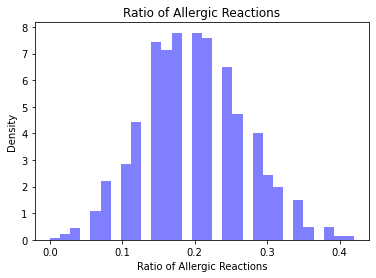

In [119]:
#Stan model
model = CmdStanModel(stan_file='code_1.stan')

# 5. genarated 1000 samples
samples = model.sample(fixed_param=True, iter_sampling=1000, iter_warmup=1, chains=1)
y_draws = samples.stan_variable('y')

# 6.Compute ratio of allergic reactions
ratios = y_draws / 50  # Since N is fixed at 50

# Histogram
plt.hist(ratios, bins=30, density=True, alpha=0.5, color='b')
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Density')
plt.title('Ratio of Allergic Reactions')
plt.show()

## Excercise 2 - Modeling posterior and posterior predictive distribution

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/lab3/code_2.stan to exe file /GA/Data-Analytics/lab3/code_2


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/lab3/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


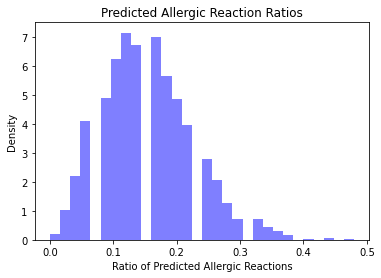

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p       0.152  0.050   0.061    0.241      0.001    0.001    1525.0    1735.0   
y_pred  7.609  3.561   2.000   14.000      0.077    0.054    2116.0    2910.0   

        r_hat  
p         1.0  
y_pred    1.0  
94% density interval of predicted ratio: [0.04, 0.28]
Expected value of p: 0.152
94% density interval of parameter p: [0.061, 0.241]
Probability that ratio is lower than the average from traditional vaccines: 0.1985


In [120]:
data = {'N': 50, 'y': 7}  

model = CmdStanModel(stan_file='code_2.stan')

samples = model.sample(data=data, chains=4)

y_pred = samples.stan_variable('y_pred')
ratios = y_pred / data['N']

plt.hist(ratios, bins=30, density=True, alpha=0.5, color='b')
plt.xlabel('Ratio of Predicted Allergic Reactions')
plt.ylabel('Density')
plt.title('Predicted Allergic Reaction Ratios')
plt.show()

summary = az.summary(samples, var_names=['p', 'y_pred'], hdi_prob=0.94)
print(summary)
expected_p = summary.loc['p', 'mean']
hdi_low, hdi_high = summary.loc['y_pred', ['hdi_3%', 'hdi_97%']] / data['N']
print(f"94% density interval of predicted ratio: [{hdi_low}, {hdi_high}]")
print(f"Expected value of p: {expected_p}")
print(f"94% density interval of parameter p: [{summary.loc['p', 'hdi_3%']}, {summary.loc['p', 'hdi_97%']}]")

average_probability_traditional = 0.1
probability_lower = np.mean(ratios < average_probability_traditional)
print(f"Probability that ratio is lower than the average from traditional vaccines: {probability_lower}")